In [112]:

import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [113]:
df= pd.read_csv("movies.csv")

In [114]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8043 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [116]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2823
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [117]:
# homepage contains 7930 nulls - Remove field
# genres contains 23 nulls - Remove entries

In [118]:
df=df.drop('homepage',axis=1)

In [119]:
df= df[pd.notnull(df['genres'])]


remove the rows that budget_adj or revenue_adj has a zero amount

In [120]:
df=df.ix[df['budget_adj']>0]
df=df.ix[df['revenue_adj']>0]

C:\Users\dengl\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\dengl\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [121]:
# remove null values in production_companies,keywords

In [122]:
df= df[pd.notnull(df['keywords'])]

df =df[pd.notnull(df['production_companies'])]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 0 to 10848
Data columns (total 20 columns):
id                      3680 non-null int64
imdb_id                 3680 non-null object
popularity              3680 non-null float64
budget                  3680 non-null int64
revenue                 3680 non-null int64
original_title          3680 non-null object
cast                    3678 non-null object
director                3680 non-null object
tagline                 3448 non-null object
keywords                3680 non-null object
overview                3680 non-null object
runtime                 3680 non-null int64
genres                  3680 non-null object
production_companies    3680 non-null object
release_date            3680 non-null object
vote_count              3680 non-null int64
vote_average            3680 non-null float64
release_year            3680 non-null int64
budget_adj              3680 non-null float64
revenue_adj             3680 non-null fl

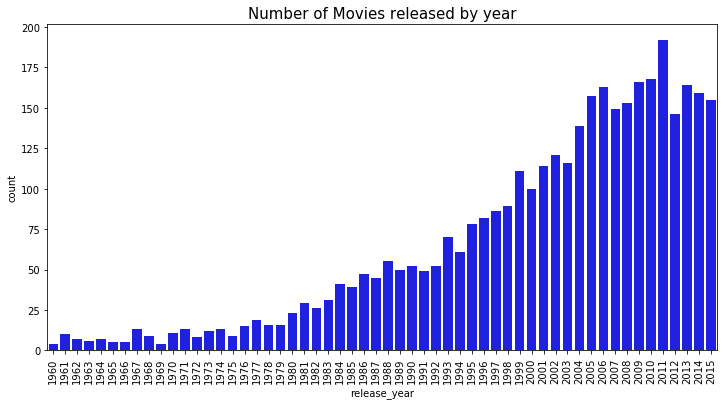

In [124]:
plt.figure (figsize=(12,6))
ax = sns.countplot(df["release_year"],color='b')
plt.xticks(rotation=90)
# ax.set_xticklabels(movie["release_year"], rotation=90,fontsize=15)
plt.title('Number of Movies released by year', 
          fontdict={'fontsize': 15})
plt.show()

In [125]:
import csv

In [126]:
df.to_csv('cleaned_movie.csv')

Question 1: How have movie genres changed over time?


In [127]:
genres= df['genres'].unique()
df['genres']=df['genres'].apply(lambda x:str(x).split('|')[0])
data = df.loc[:,['id','release_year','genres']]


In [128]:
data.head()

,id,release_year,genres
0,135397,2015,Action
1,76341,2015,Action
2,262500,2015,Adventure
3,140607,2015,Action
4,168259,2015,Action


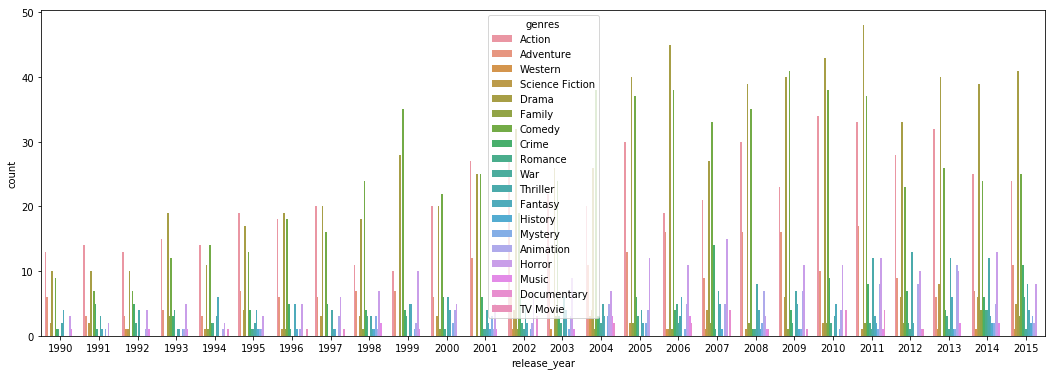

In [129]:
plt.figure (figsize=(18,6))
sns.countplot(x='release_year',hue='genres',data=data[data["release_year"]>1989])

Q 2: How do the attributes differ between Universal Pictures and Paramount Pictures?

In [140]:
df= df[pd.notnull(df['tagline'])]

In [161]:
df['production_companies']=df['production_companies'].apply(lambda x:str(x).split('|')[0])
data2 = df.loc[:,["id","original_title","popularity","budget_adj", "revenue_adj", "tagline", 
                 "keywords","genres","production_companies", "vote_average","release_year"]]


In [162]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3448 entries, 0 to 10848
Data columns (total 11 columns):
id                      3448 non-null int64
original_title          3448 non-null object
popularity              3448 non-null float64
budget_adj              3448 non-null float64
revenue_adj             3448 non-null float64
tagline                 3448 non-null object
keywords                3448 non-null object
genres                  3448 non-null object
production_companies    3448 non-null object
vote_average            3448 non-null float64
release_year            3448 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 483.2+ KB


In [163]:
data2['production_companies']=data2['production_companies'].replace(['Universal','Universal Pictures Corporation',
                                       'Universal Studios','Universal TV'],'Universal Pictures')


In [164]:
data2['production_companies']=data2['production_companies'].replace(['Paramount Classics','Paramount Vantage'],'Paramount Pictures')

In [165]:
data2['production_companies']

0                            Universal Pictures
1                     Village Roadshow Pictures
2                          Summit Entertainment
3                                     Lucasfilm
4                            Universal Pictures
5                           Regency Enterprises
6                            Paramount Pictures
7        Twentieth Century Fox Film Corporation
8                            Universal Pictures
9                          Walt Disney Pictures
10                            Columbia Pictures
11                    Village Roadshow Pictures
12                                    DNA Films
13                            Columbia Pictures
14                               Marvel Studios
15                         Double Feature Films
16       Twentieth Century Fox Film Corporation
17                               Marvel Studios
18                         Walt Disney Pictures
19                            Studio Babelsberg
20                         Walt Disney P

In [166]:
data2.to_csv('companies.csv')

In [167]:
uni = data2.ix[data2['production_companies']=='Universal Pictures']
par = data2.ix[data2['production_companies']=='Paramount Pictures']

C:\Users\dengl\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [168]:
uni.head()
par.head()

,id,original_title,popularity,budget_adj,revenue_adj,tagline,keywords,genres,production_companies,vote_average,release_year
6,87101,Terminator Genisys,8.654359,1.425999e+08,4.053551e+08,Reset the future,saving the world|artificial intelligence|cybor...,Science Fiction,Paramount Pictures,5.8,2015
24,318846,The Big Short,4.648046,2.575999e+07,1.226787e+08,This is a true story.,bank|fraud|biography|wall street|finances,Comedy,Paramount Pictures,7.3,2015
25,177677,Mission: Impossible - Rogue Nation,4.566713,1.379999e+08,6.277435e+08,Desperate Times. Desperate Measures.,spy|sequel|mission,Action,Paramount Pictures,7.1,2015
91,274167,Daddy's Home,1.904898,4.599998e+07,2.211315e+08,Choose your Daddy,daddys home,Comedy,Paramount Pictures,5.7,2015
106,273477,Scouts Guide to the Zombie Apocalypse,1.499614,1.379999e+07,1.367190e+07,Always bring protection.,female nudity|shotgun|nudity|strip club|party,Comedy,Paramount Pictures,6.2,2015


Question 3: How have movies based on novels performed relative to movies not based on novels?

In [ ]:
# count 'novel'

In [176]:
total= data2.shape[0]
wd_count =0
for i,keyword in data2['keywords'].iteritems():
    if 'novel' in keyword:
        wd_count += 1
print (wd_count,total)

(164, 3448)


In [183]:
data3 = data2.loc[:,["id","original_title","popularity","budget_adj", "revenue_adj", "tagline", 
                 "keywords","genres","production_companies","vote_average","release_year"]]

In [186]:
data3 ['novel'] = data3['keywords'].apply(lambda x: "novel" in x)

d = data3

In [187]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3448 entries, 0 to 10848
Data columns (total 12 columns):
id                      3448 non-null int64
original_title          3448 non-null object
popularity              3448 non-null float64
budget_adj              3448 non-null float64
revenue_adj             3448 non-null float64
tagline                 3448 non-null object
keywords                3448 non-null object
genres                  3448 non-null object
production_companies    3448 non-null object
vote_average            3448 non-null float64
release_year            3448 non-null int64
novel                   3448 non-null bool
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 486.6+ KB


In [188]:
d.to_csv('novel movie.csv')